In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib import cm
import mplcyberpunk
from astropy.convolution import convolve, Box1DKernel
from scipy.optimize import leastsq
from scipy.interpolate import interp1d
from astropy.modeling import models, fitting
from astropy.time import Time


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Cyberpunking the LRS2 spectrum

In [6]:
def make_plot_spec(w, f, e, mask1, mask2, smooth=10): #cuts spectrum down to the bit to plot
    fitter = fitting.LinearLSQFitter()
    #mask = (w > 8450) & (w < 8480) | (w > 8520) & (w <8540) | (w > 8560) & (w< 8660) | (w > 8680) & (w < 8700) #mask out emmission lines
    w1, f1 = w[mask1], f[mask1]
    n_init = models.Polynomial1D(3)
    n_fit = fitter(n_init, w1, f1)
    #mask = (w > 8450) & (w < 8700)
    nf = f/n_fit(w)
    ne = e/n_fit(w)
    if smooth == 0:
        smooth = 1
    nf = convolve(nf,Box1DKernel(smooth))
    ne = convolve(ne,Box1DKernel(smooth))/smooth**0.5
    w1, f1, e1 = w[mask2], nf[mask2], ne[mask2]
    return w1,f1, e1
    

In [7]:
hetpath = '/media/david/5tb_storage1/gas_discs/0845/het_data/UT21-1-016/'
hetspecs = glob.glob('{}spectrum*d.fits'.format(hetpath))
frspec = hetspecs[0]
data = fits.getdata(frspec)
w, f, e = data[0], data[1], data[3]

 [astropy.modeling.fitting]


(8451.0, 8699.0)

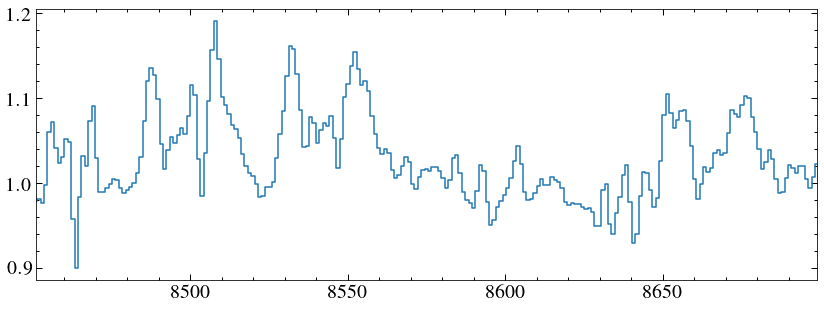

In [8]:
mask1 = (w > 8400) & (w < 8475) | (w > 8515) & (w < 8522) | (w > 8565)  & (w< 8640) | (w > 8685) & (w < 8750)
mask2 = (w> 8450) & (w < 8700) 
wn, fn, en =  make_plot_spec(w, f,e , mask1, mask2, smooth=2)
plt.step(wn, fn, where='mid')
plt.xlim(8451, 8699)


 [astropy.modeling.fitting]


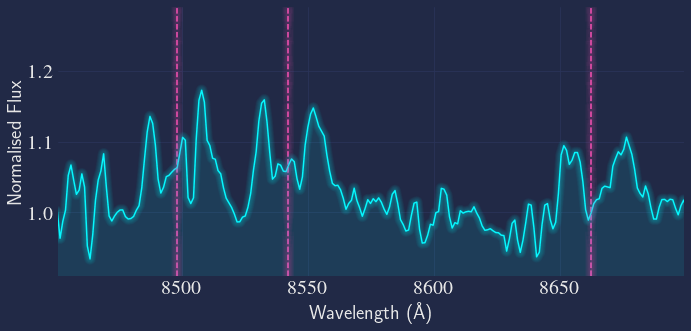

In [32]:
plt.style.use("cyberpunk")
plt.figure(figsize=(10,5))
wn, fn, en =  make_plot_spec(w, f,e , mask1, mask2, smooth=3)
plt.plot(wn, fn)
plt.xlim(8451, 8699)
lines = [8498.02,8542.09,8662.14]   
[plt.axvline(line, ls='--', c='C1', zorder=-1) for line in lines]
mplcyberpunk.add_glow_effects()
plt.ylim(0.91, 1.29)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Normalised Flux')
plt.tight_layout()
plt.savefig('plots/lrs2_cp_150.png', dpi=150)

Science! Plot

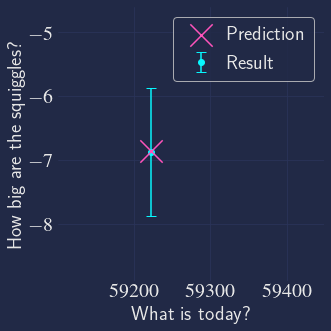

In [66]:
plt.figure(figsize=(5, 5))
ew= -6.87601291051759
ewe = 1.0045938623283448
mjd =  59222.4584767111
pred = -6.865363731686216


plt.scatter(mjd, pred, marker ='x', c='C1',s=500, zorder=10, label='Prediction')
plt.errorbar(mjd, ew, yerr=ewe, marker='o', capsize=5, label='Result', ls='none')

plt.ylim(-8.9, -4.6)
plt.xlim(59101, 59449)

plt.xlabel('What is today?')
plt.ylabel('How big are the squiggles?')
plt.legend(frameon=True)
plt.tight_layout()
plt.savefig('plots/cp_jokesci.png', dpi=150)